## Loan Prediction

## Table of Contents
1. Getting the system ready and loading the data
2. Understanding the data
3. Missing value and outlier treatment
4. splitting the data
5. Data preprocessing
6. Model Building
    i. Logistic Regression
    Model evaluation
    
7. Model Building
    ii. Random Forest
     Model evaluation

### 1. Getting the system ready and loading the data


Used libraries

1. Pandas
2. Num1py
3. Seaborn
4. Matplotlib
5. Sklearn

In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [129]:
df = pd.read_csv(r"C:\Users\CHINMAY\Documents\loan_status.csv")


### 2. Understanding the data


In [130]:
df.shape

(614, 13)

In [89]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [90]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [91]:
df.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [92]:
df.Loan_Status.value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:>

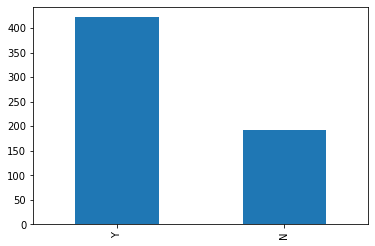

In [93]:
df['Loan_Status'].value_counts().plot.bar()


Now, let's visualize each variable separately. Different types of variables are Categorical, ordinal and numerical.

Categorical features: These features have categories (Gender, Married, Self_Employed, Credit_History, Loan_Status)

Ordinal features: Variables in categorical features having some order involved (Dependents, Education, Property_Area)

Numerical features: These features have numerical values (ApplicantIncome, CoapplicantIncome, LoanAmount,Loan_Amount_Term)

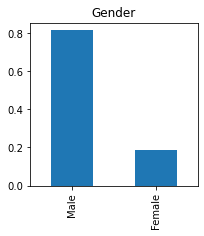

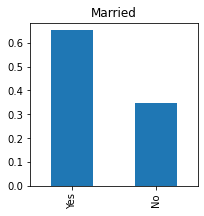

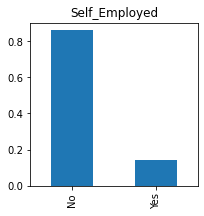

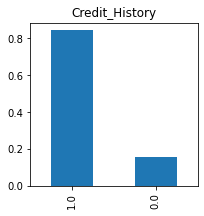

In [94]:
#categorical variables

i=3
df['Gender'].value_counts(normalize=True).plot.bar(figsize=(i,i), title='Gender')
plt.show()
df['Married'].value_counts(normalize=True).plot.bar(figsize=(i,i), title='Married')
plt.show()
df['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(i,i), title='Self_Employed')
plt.show()
df['Credit_History'].value_counts(normalize=True).plot.bar(figsize=(i,i), title='Credit_History')
plt.show()


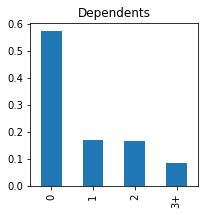

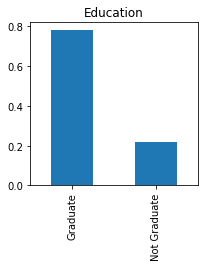

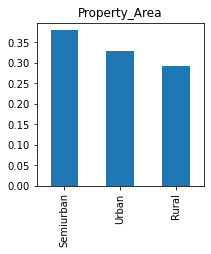

In [95]:
#Ordinal variables

df['Dependents'].value_counts(normalize=True).plot.bar(figsize=(i,i), title='Dependents')
plt.show()
df['Education'].value_counts(normalize=True).plot.bar(figsize=(i,i), title='Education')
plt.show()
df['Property_Area'].value_counts(normalize=True).plot.bar(figsize=(i,i), title='Property_Area')
plt.show()

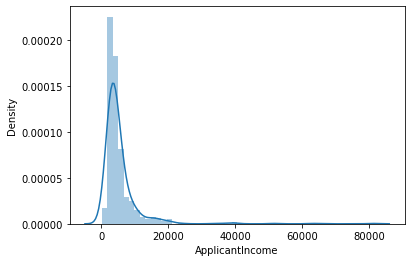

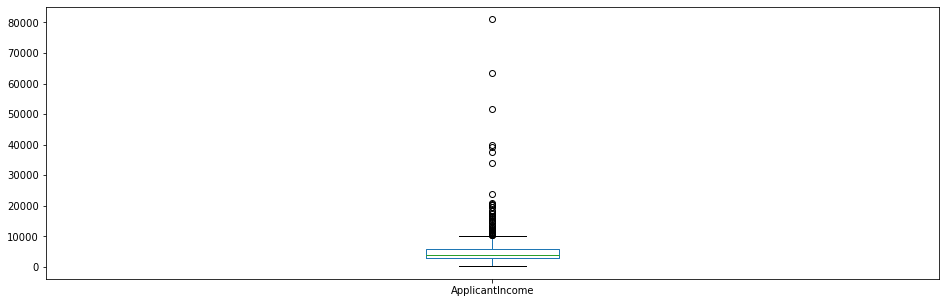

In [96]:
#Numerical variable

sns.distplot(df['ApplicantIncome'])
plt.show()
df['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

Text(0.5, 0.98, '')

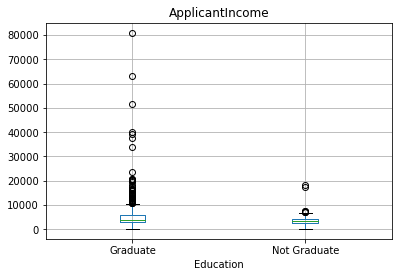

In [97]:
#comparing income education vise using boxplot
df.boxplot(column='ApplicantIncome', by = 'Education') 
plt.suptitle("")

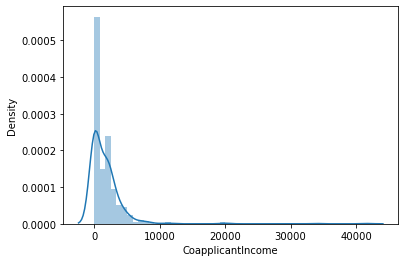

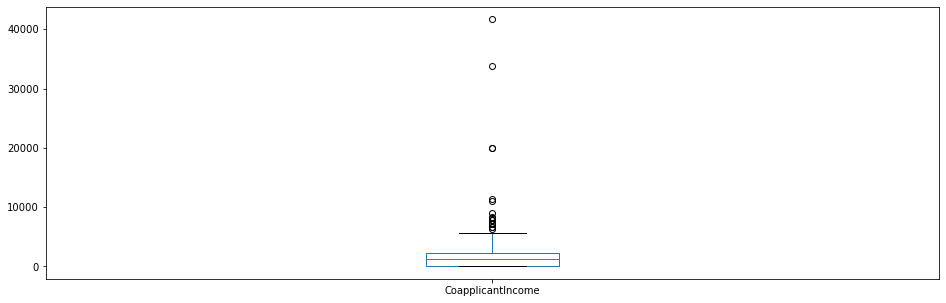

In [98]:
#comparing co applicant income using boxplot

sns.distplot(df['CoapplicantIncome'])
plt.show()
df['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

### finding correlation using correlation matrix

<AxesSubplot:>

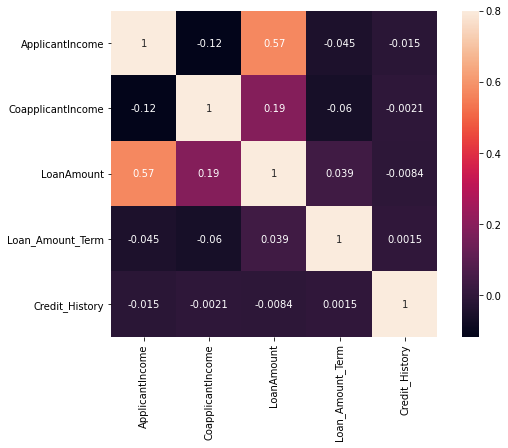

In [99]:
matrix = df.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True, annot = True)

### 3. Missing value and outlier treatment


In [100]:
# number of missing values in each column
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [101]:
# dropping the missing values
df = df.dropna()

#### Label encoding

In [102]:
# label encoding
df.replace({"Loan_Status":{'N':0,'Y':1}}, inplace=True)

In [103]:
# printing the first 5 rows of the dataframe
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [104]:
# Dependent column values
df['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [105]:
# replacing the value of 3+ to 4
df = df.replace(to_replace='3+', value=4)
df.Dependents.value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

In [106]:
# convert categorical columns to numerical values
df.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [107]:
# separating the data and label
X = df.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = df['Loan_Status']

### 4. splitting the data


In [108]:
from sklearn.model_selection import train_test_split 
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [109]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (432, 11) (48, 11)


### 5. Data preprocessing


In [110]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scalar.fit_transform(X_train)
scalar.transform(X_test)

array([[ 0.47307086,  0.74804197,  0.11672378,  0.50216921, -0.41319694,
         0.13245901, -0.58292918,  0.34469918,  0.27632162,  0.39771465,
        -0.00880076],
       [ 0.47307086,  0.74804197,  2.5566274 ,  0.50216921,  2.42015348,
        -0.04650905,  0.07830781,  0.48972966,  0.27632162,  0.39771465,
        -0.00880076],
       [ 0.47307086,  0.74804197,  2.5566274 ,  0.50216921, -0.41319694,
        -0.26045954,  2.30578934,  1.73457463,  0.27632162,  0.39771465,
        -0.00880076],
       [ 0.47307086,  0.74804197,  0.93002499,  0.50216921, -0.41319694,
        -0.15635725, -0.58292918, -0.15082163,  0.27632162,  0.39771465,
         1.25850834],
       [-2.11384825,  0.74804197, -0.69657742,  0.50216921, -0.41319694,
        -0.51665933,  0.27511341, -0.11456401,  0.27632162,  0.39771465,
        -0.00880076],
       [ 0.47307086,  0.74804197, -0.69657742,  0.50216921, -0.41319694,
        -0.54217791,  0.31797826, -0.12664988,  0.27632162,  0.39771465,
         1.258

### 6. Model Building
    i. Logistic Regression
  

In [111]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()


In [112]:
#Training the model
model.fit(X_train,Y_train)

LogisticRegression()

### Model evaluation using accuracy score

In [113]:
# accuracy score on training data
from sklearn.metrics import accuracy_score
X_train_prediction = model.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,Y_train)

In [114]:
print('Accuracy on training data : ', training_data_accuray)

Accuracy on training data :  0.8009259259259259


In [115]:
print('Accuracy on test data : ', test_data_accuray)

Accuracy on test data :  0.8333333333333334


### Model evaluation using classification report


In [128]:
from sklearn.metrics import classification_report

c_class = classification_report(X_test_prediction, Y_test, output_dict=True)

c_class1 = pd.DataFrame(c_class)
c_class1

,0,1,accuracy,macro avg,weighted avg
precision,0.600000,0.909091,0.8125,0.754545,0.831818
recall,0.750000,0.833333,0.8125,0.791667,0.812500
f1-score,0.666667,0.869565,0.8125,0.768116,0.818841
support,12.000000,36.000000,0.8125,48.000000,48.000000


### 7. Model Building
    ii. Random Forest

In [116]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [117]:
#Training the model
model.fit(X_train,Y_train)

RandomForestClassifier()

### Model evaluation using accuracy score


In [118]:
# accuracy score on training data
X_train_prediction = model.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,Y_train)

print('Accuracy on training data : ', training_data_accuray)

Accuracy on training data :  1.0


In [119]:
# accuracy score on training data
X_test_prediction = model.predict(X_test)
test_data_accuray = accuracy_score(X_test_prediction,Y_test)

print('Accuracy on test data : ', test_data_accuray)

Accuracy on test data :  0.8125


### Model evaluation using classification report


In [127]:
c_class = classification_report(X_test_prediction, Y_test, output_dict=True)

c_class1 = pd.DataFrame(c_class)
c_class1

,0,1,accuracy,macro avg,weighted avg
precision,0.600000,0.909091,0.8125,0.754545,0.831818
recall,0.750000,0.833333,0.8125,0.791667,0.812500
f1-score,0.666667,0.869565,0.8125,0.768116,0.818841
support,12.000000,36.000000,0.8125,48.000000,48.000000
